In [1]:
import pandas as pd
import numpy as np 

In [2]:
df1 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\project\section2_porject_210222\winemag-data-130k-v2.csv", index_col=0)

In [3]:
title_lists = df1["title"].tolist()

In [4]:
import re

In [5]:
year_wine = []
for list in title_lists :
    test = re.findall("\d+", list)
    for i in test:
        if int(i) > 2002 :
            df1["year"] = int(i)
        else :
            df1["year"] = 0

In [6]:
df1.shape

(129971, 14)

In [7]:
df1.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2012


In [8]:
df1["winery"].describe()

count                 129971
unique                 16757
top       Wines & Winemakers
freq                     222
Name: winery, dtype: object

In [9]:
df1["winery"].isnull().sum()

0

In [15]:
df2 = pd.DataFrame(df1["winery"].value_counts())

In [11]:
# data wrangling을 통한 카테고리데이터 점수화 
df1 = pd.merge(df1, df2, left_on="winery", right_index=True)

In [12]:
df1['region'] = df1.title.str.split('(').str[1]
df1['region'] = df1.region.str.split(')').str[0]
df1['region']

0                                   Etna
9959                                Etna
12551                               Etna
31875     Cerasuolo di Vittoria Classico
31876                               Etna
                       ...              
129741              Russian River Valley
129753                      Western Cape
129761                 Côtes de Provence
129856                       Rías Baixas
129890                     Luján de Cuyo
Name: region, Length: 129971, dtype: object

In [16]:
df1['variety'].describe()

count         129970
unique           707
top       Pinot Noir
freq           13272
Name: variety, dtype: object

In [29]:
df2 = pd.DataFrame(df1["variety"].value_counts())
df2[df2["variety"] < 10 ].value_counts().sum()

410

<AxesSubplot:>

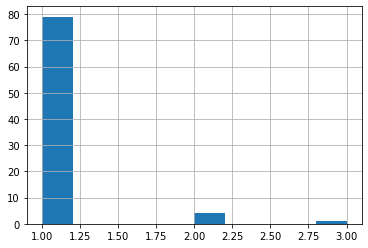

In [33]:
df2[df2["variety"] > 100 ].value_counts().hist()

<AxesSubplot:>

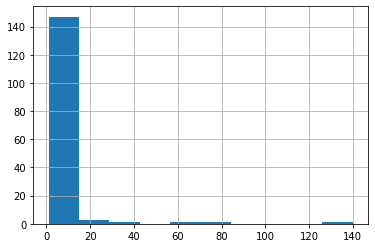

In [31]:
df2["variety"].value_counts().hist()

<AxesSubplot:>

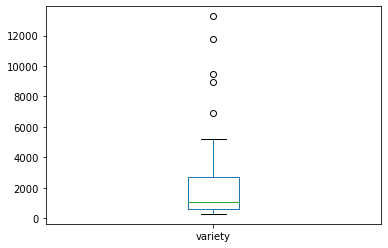

In [39]:
df1['variety'].value_counts().head(50).plot(kind="box")

In [14]:
df1.shape

(129971, 17)